In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/deida/Documents/CodeYou/Data_Analysis/my_data_project/phish_setlist_analysis/phish.csv')

print(df.shape)

(30883, 31)


In [4]:
print(df.columns)


Index(['song', 'date', 'position', 'set', 'set_name', 'location', 'venue_name',
       'tour', 'ratings', 'duration_song', 'duration_show', 'like_count_song',
       'like_count_show', 'id_song', 'id_show', 'id_tour', 'artist',
       'total_times_played', 'debut', 'year', 'gap', 'notes', 'debut_dummy',
       'notes_dummy', 'cover_dummy', 'adj_gap', 'city', 'state', 'country',
       'latitude', 'longitude'],
      dtype='object')


In [17]:
print(df.isnull().sum())

song                     0
date                     0
position                 0
set                      0
set_name                 0
location                 0
venue_name               0
tour                     0
ratings                  0
duration_song            3
duration_show          238
like_count_song          0
like_count_show          0
id_song                  0
id_show                  0
id_tour                  0
artist                 799
total_times_played     799
debut                  803
year                     0
gap                    938
notes                  938
debut_dummy            938
notes_dummy            938
cover_dummy              0
adj_gap               1772
city                     0
state                  989
country                  0
latitude                 0
longitude                0
dtype: int64


In [18]:
df.drop(columns = ['duration_show', 'like_count_show','id_song', 'id_show', 'id_tour', 'adj_gap', 'latitude', 'longitude' , 'notes', 'debut_dummy', 'notes_dummy', 'set'])

,song,date,position,set_name,location,venue_name,tour,ratings,duration_song,like_count_song,artist,total_times_played,debut,year,gap,cover_dummy,city,state,country
0,Scarlet Begonias,1983-12-02T00:00:00Z,1,Set 2,"Burlington, VT","Harris-Millis Cafeteria, University of Vermont",1983 Tour,4.2128,09:18,3,Grateful Dead,3.0,1983-12-02,1983.0,1.0,1,Burlington,VT,United States
1,Fire on the Mountain,1983-12-02T00:00:00Z,2,Set 2,"Burlington, VT","Harris-Millis Cafeteria, University of Vermont",1983 Tour,4.2128,07:53,3,Diga Rhythm Band,2.0,1983-12-02,1983.0,1.0,1,Burlington,VT,United States
2,In the Midnight Hour,1984-11-03T00:00:00Z,1,Set 1,"Burlington, VT","Slade Hall, University of Vermont",1984 Tour,3.2963,06:23,0,Wilson Pickett,5.0,1983-12-02,1984.0,3.0,1,Burlington,VT,United States
3,Wild Child > Jam,1984-11-03T00:00:00Z,2,Set 1,"Burlington, VT","Slade Hall, University of Vermont",1984 Tour,3.2963,05:20,4,NaN,NaN,NaN,1984.0,NaN,1,Burlington,VT,United States
4,Bertha > St. Stephen,1984-11-03T00:00:00Z,3,Set 1,"Burlington, VT","Slade Hall, University of Vermont",1984 Tour,3.2963,13:39,1,NaN,NaN,NaN,1984.0,NaN,1,Burlington,VT,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30878,Carini,2017-01-15T00:00:00Z,15,Set 2,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,08:48,0,Phish,90.0,1997-02-17,2017.0,3.0,0,Riviera Maya,Quintana Roo,Mexico
30879,David Bowie,2017-01-15T00:00:00Z,16,Set 2,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,13:36,1,Phish,471.0,1986-10-31,2017.0,12.0,0,Riviera Maya,Quintana Roo,Mexico
30880,Harry Hood,2017-01-15T00:00:00Z,17,Set 2,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,12:23,2,Phish,371.0,1985-10-30,2017.0,5.0,0,Riviera Maya,Quintana Roo,Mexico
30881,Slave to the Traffic Light,2017-01-15T00:00:00Z,18,Encore,"Riviera Maya, Quintana Roo Mexico",Barcelo Maya Beach,2017 Riviera Maya Run,4.5560,11:01,0,Phish,233.0,1984-12-01,2017.0,3.0,0,Riviera Maya,Quintana Roo,Mexico


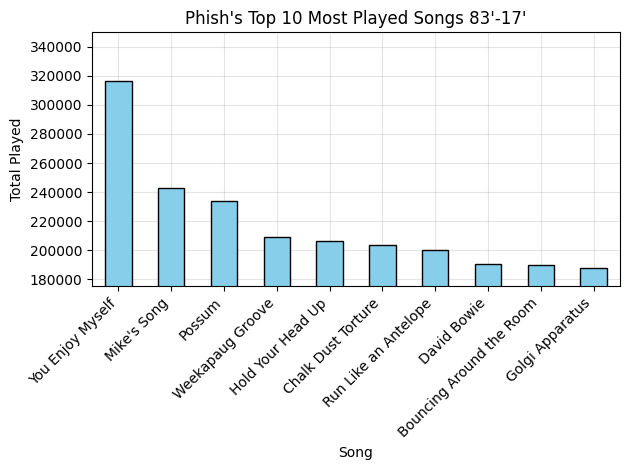

In [41]:
#Top 10 Most Played Songs Bar Chart

top_songs = df.groupby('song')['total_times_played'].sum().nlargest(10)
# Create the bar plot
top_songs.plot(kind='bar', color='skyblue', edgecolor='black')
# Set the title and labels
plt.title("Phish's Top 10 Most Played Songs 83'-17'")
plt.xlabel('Song')
plt.ylabel('Total Played')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.ylim(175000, 350000) # Adjust the y-axis limits
# Add a semi-transparent grid
plt.grid(True, linestyle='-', color='gray', alpha=0.2)  # Adjust alpha for transparency

# Ensure grid lines are behind the bars
plt.gca().set_axisbelow(True)
plt.tight_layout() # Adjust layout to prevent clipping
plt.show() # Display the plot


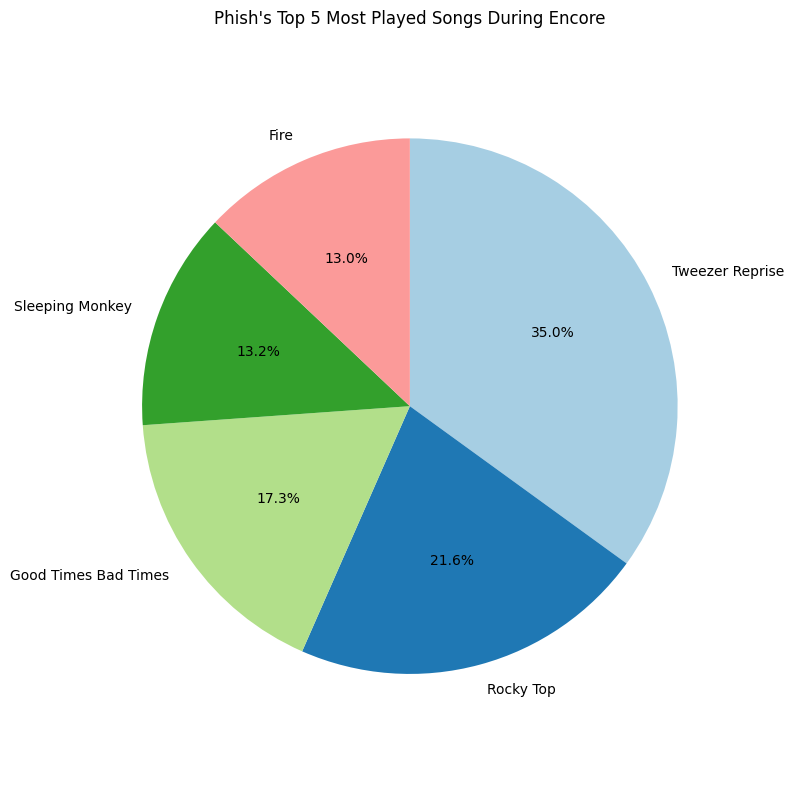

In [58]:
#Top 5 Most Played Songs During Encore Pie Chart

# Filter the dataset to include only encore performances
encore_df = df[df['set_name'] == 'Encore']

# Calculate the total number of encores
total_encores = encore_df.shape[0]

# Count the occurrences of each song in the encore setlists
encore_song_counts = encore_df['song'].value_counts()

# Select the top 5 most played songs in encores
top_encore_songs = encore_song_counts.head(5)

# Calculate the proportion of encores dedicated to each of the top 5 songs
proportions = (top_encore_songs / total_encores) * 100

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(proportions, labels=top_encore_songs.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=plt.cm.Paired.colors) #wedgeprops={'width': 0.4} (DONUT)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title("Phish's Top 5 Most Played Songs During Encore")

# Display the plot
plt.tight_layout()
plt.show()